In [ ]:
import pandas as pd
dataset = pd.read_excel('Raisin_Dataset.xlsx')

In [36]:
import numpy as np
randomized_dataset = dataset.T
shuffled_columns = np.random.permutation(randomized_dataset.columns)
shuffled_dataset = randomized_dataset[shuffled_columns].T
print(shuffled_dataset)

       Area MajorAxisLength MinorAxisLength Eccentricity ConvexArea    Extent  \
234   49715      302.347391      213.364511     0.708517      52250  0.650107   
563  118043      493.765244      308.000127     0.781601     122903  0.675597   
242   53987      331.350659      213.167446      0.76559      56076  0.673222   
135   57227       354.43108      207.594986     0.810518      59307  0.649982   
781  169494      614.993744       352.28079     0.819681     172094  0.740123   
..      ...             ...             ...          ...        ...       ...   
521   84295      458.844007      238.289021     0.854577      88521  0.708451   
835   87039      497.058056      236.212773     0.879866      96247  0.636981   
101   57820      376.191174      199.797108     0.847306      59968   0.71478   
219   49414      290.458237      219.418243      0.65524      51029  0.711034   
458  124579      439.960503      371.026214     0.537416     128307   0.69825   

    Perimeter    Class  
23

In [22]:
X = dataset.drop(columns=['Class'])
Y = dataset['Class']

In [37]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=10, shuffle=True, random_state=42)
train_indices = []
test_indices = []
for train_index, test_index in k_fold.split(X):
    train_indices.append(train_index)
    test_indices.append(test_index)
for fold in range(10):
    print(f"Fold {fold+1}:")
    print(f"Train indices:{train_indices[fold]}")
    print(f"Test indices:{test_indices[fold]}")    

Fold 1:
Train indices:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  61  62  64  65  68  69  71  73  74  75  76  77  78  79  80  81
  82  83  84  85  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 111 112 113 114 115 116 117 118 119
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 138 140 141
 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159
 160 161 162 163 164 165 166 167 169 170 171 172 173 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 199 200 201 202 203 204 205 206 207 210 212 214 216 217 219 220 221 222
 223 224 225 226 227 228 229 230 232 233 234 235 236 237 238 240 241 242
 243 244 245 246 248 249 250 251 252 253 254 255 256 257 258 259 261 262
 263 264 265 266 267 268 269 

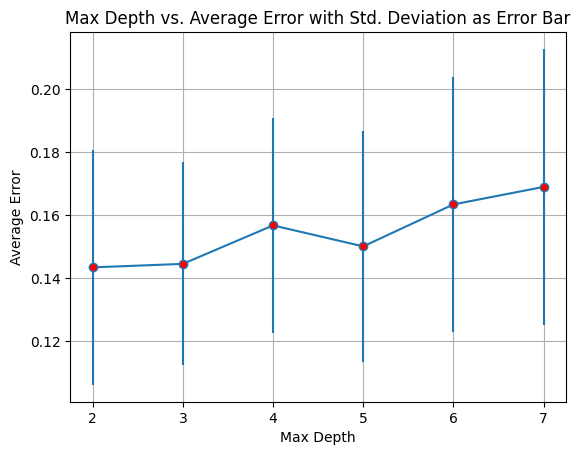

In [38]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

max_depth = range(2, 8)
avg_error = []
std_error = []

for depth in max_depth:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X, Y, cv = k_fold)
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    avg_error.append(1-avg_score)
    std_error.append(std_score)

max_depth = np.array(max_depth)
avg_error = np.array(avg_error)
std_error = np.array(std_error)

plt.errorbar(max_depth, avg_error, yerr=std_error, fmt='-o', markerfacecolor='r')
plt.title('Max Depth vs. Average Error with Std. Deviation as Error Bar')
plt.xlabel('Max Depth')
plt.ylabel('Average Error')
plt.grid(True)
plt.show()

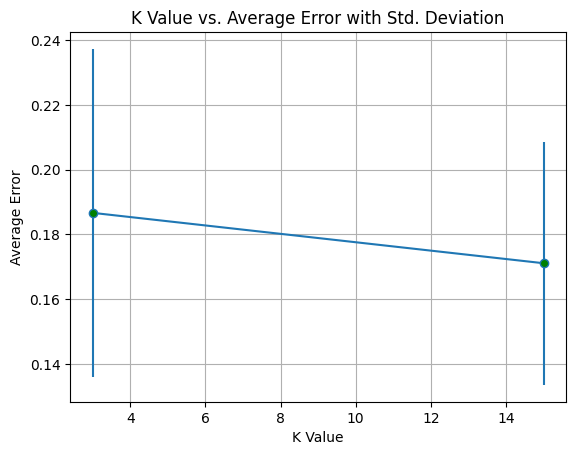

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Define a list of K values to try
k_values = [3, 15]
k_avg_errors = []
k_std_errors = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=k_fold)
    avg_score = np.mean(scores)
    std_score = np.std(scores)
    k_avg_errors.append(1 - avg_score)
    k_std_errors.append(std_score)

k_values = np.array(k_values)
k_avg_errors = np.array(k_avg_errors)
k_std_errors = np.array(k_std_errors)

plt.errorbar(k_values, k_avg_errors, yerr=k_std_errors, fmt='-o', markerfacecolor='g')
plt.title('K Value vs. Average Error with Std. Deviation')
plt.xlabel('K Value')
plt.ylabel('Average Error')
plt.grid(True)
plt.show()
